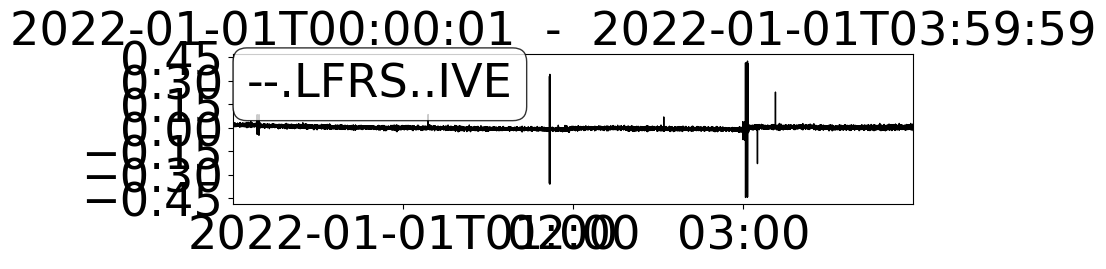

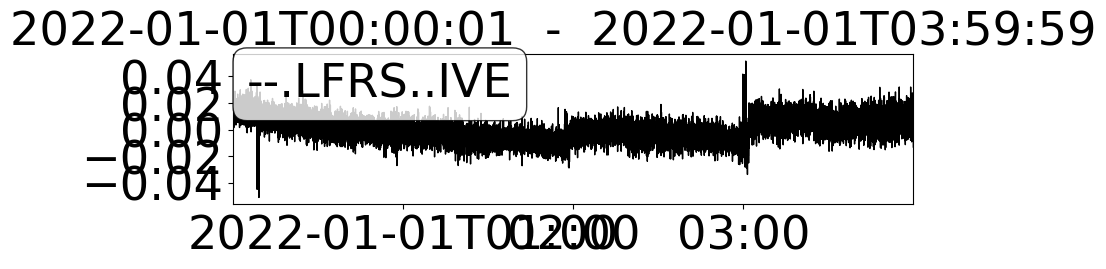

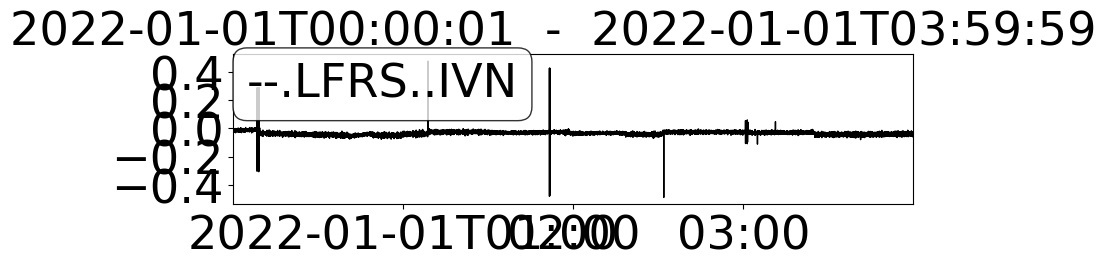

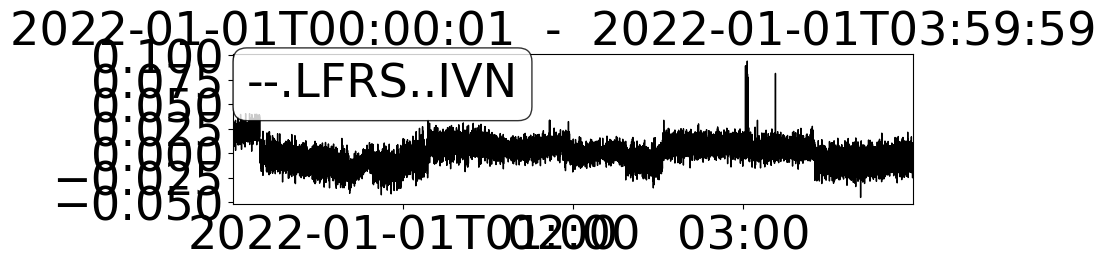

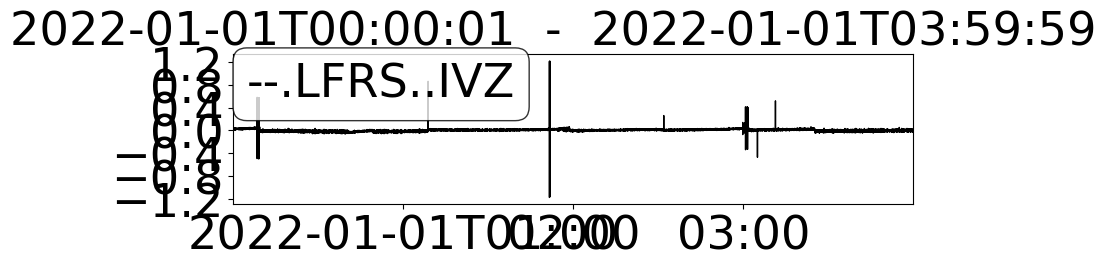

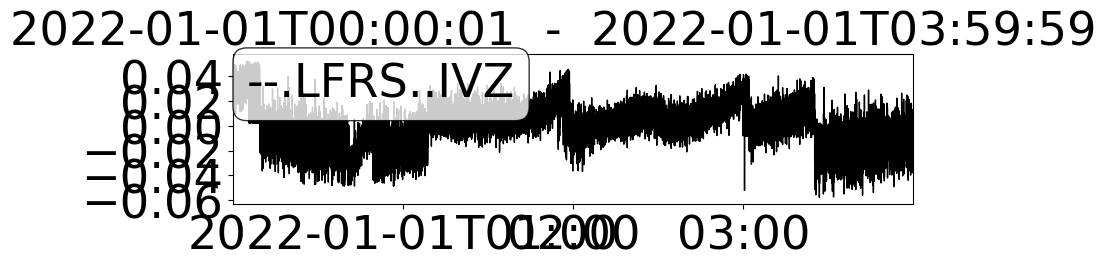

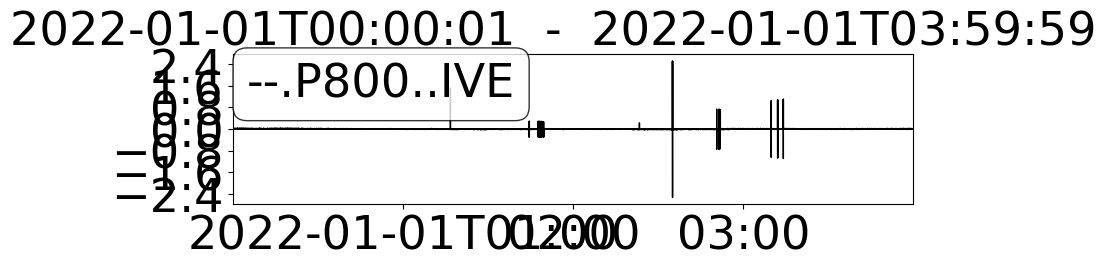

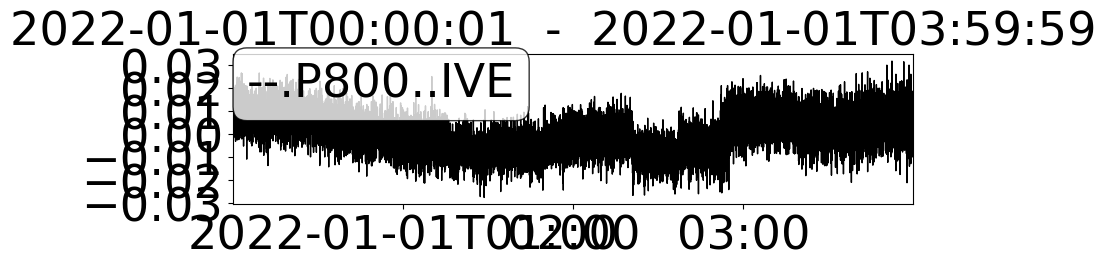

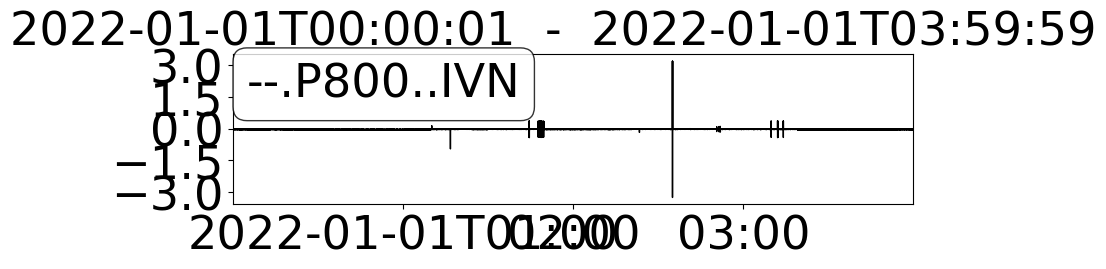

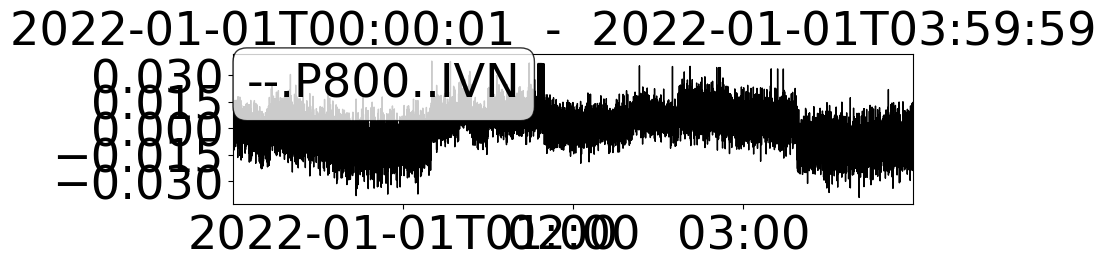

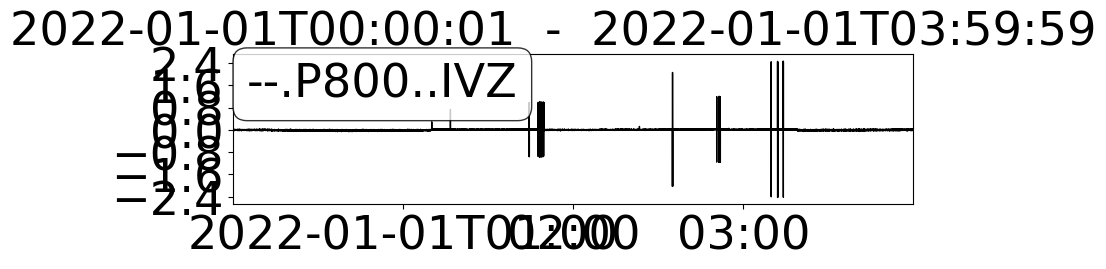

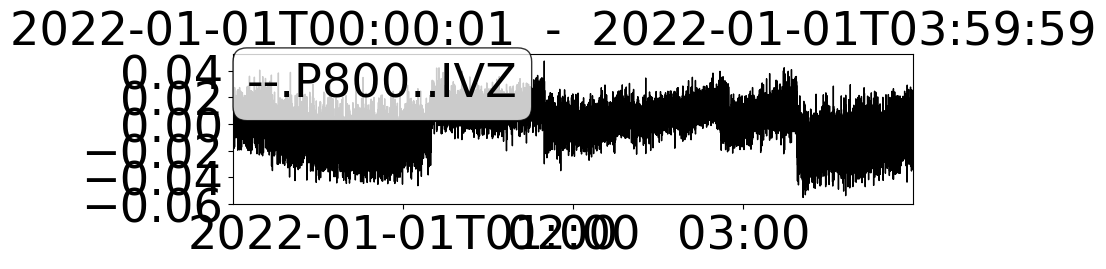

[-0.00253543 -0.00210425  0.00329154 ...  0.00055684 -0.00599111
 -0.00233089]
[-0.0104638  -0.00011673 -0.00743478 ... -0.00896831  0.00097206
  0.00309141]
[ 0.0074725  -0.00627409 -0.00976447 ... -0.0074194  -0.00615689
  0.01268323]
1699
0.044952502074080206
-12698
3018
0.06327032377517716
-11379
2991
0.06562834558818183
-11406


ValueError: x and y must have same first dimension, but have shapes (28799,) and (28797,)

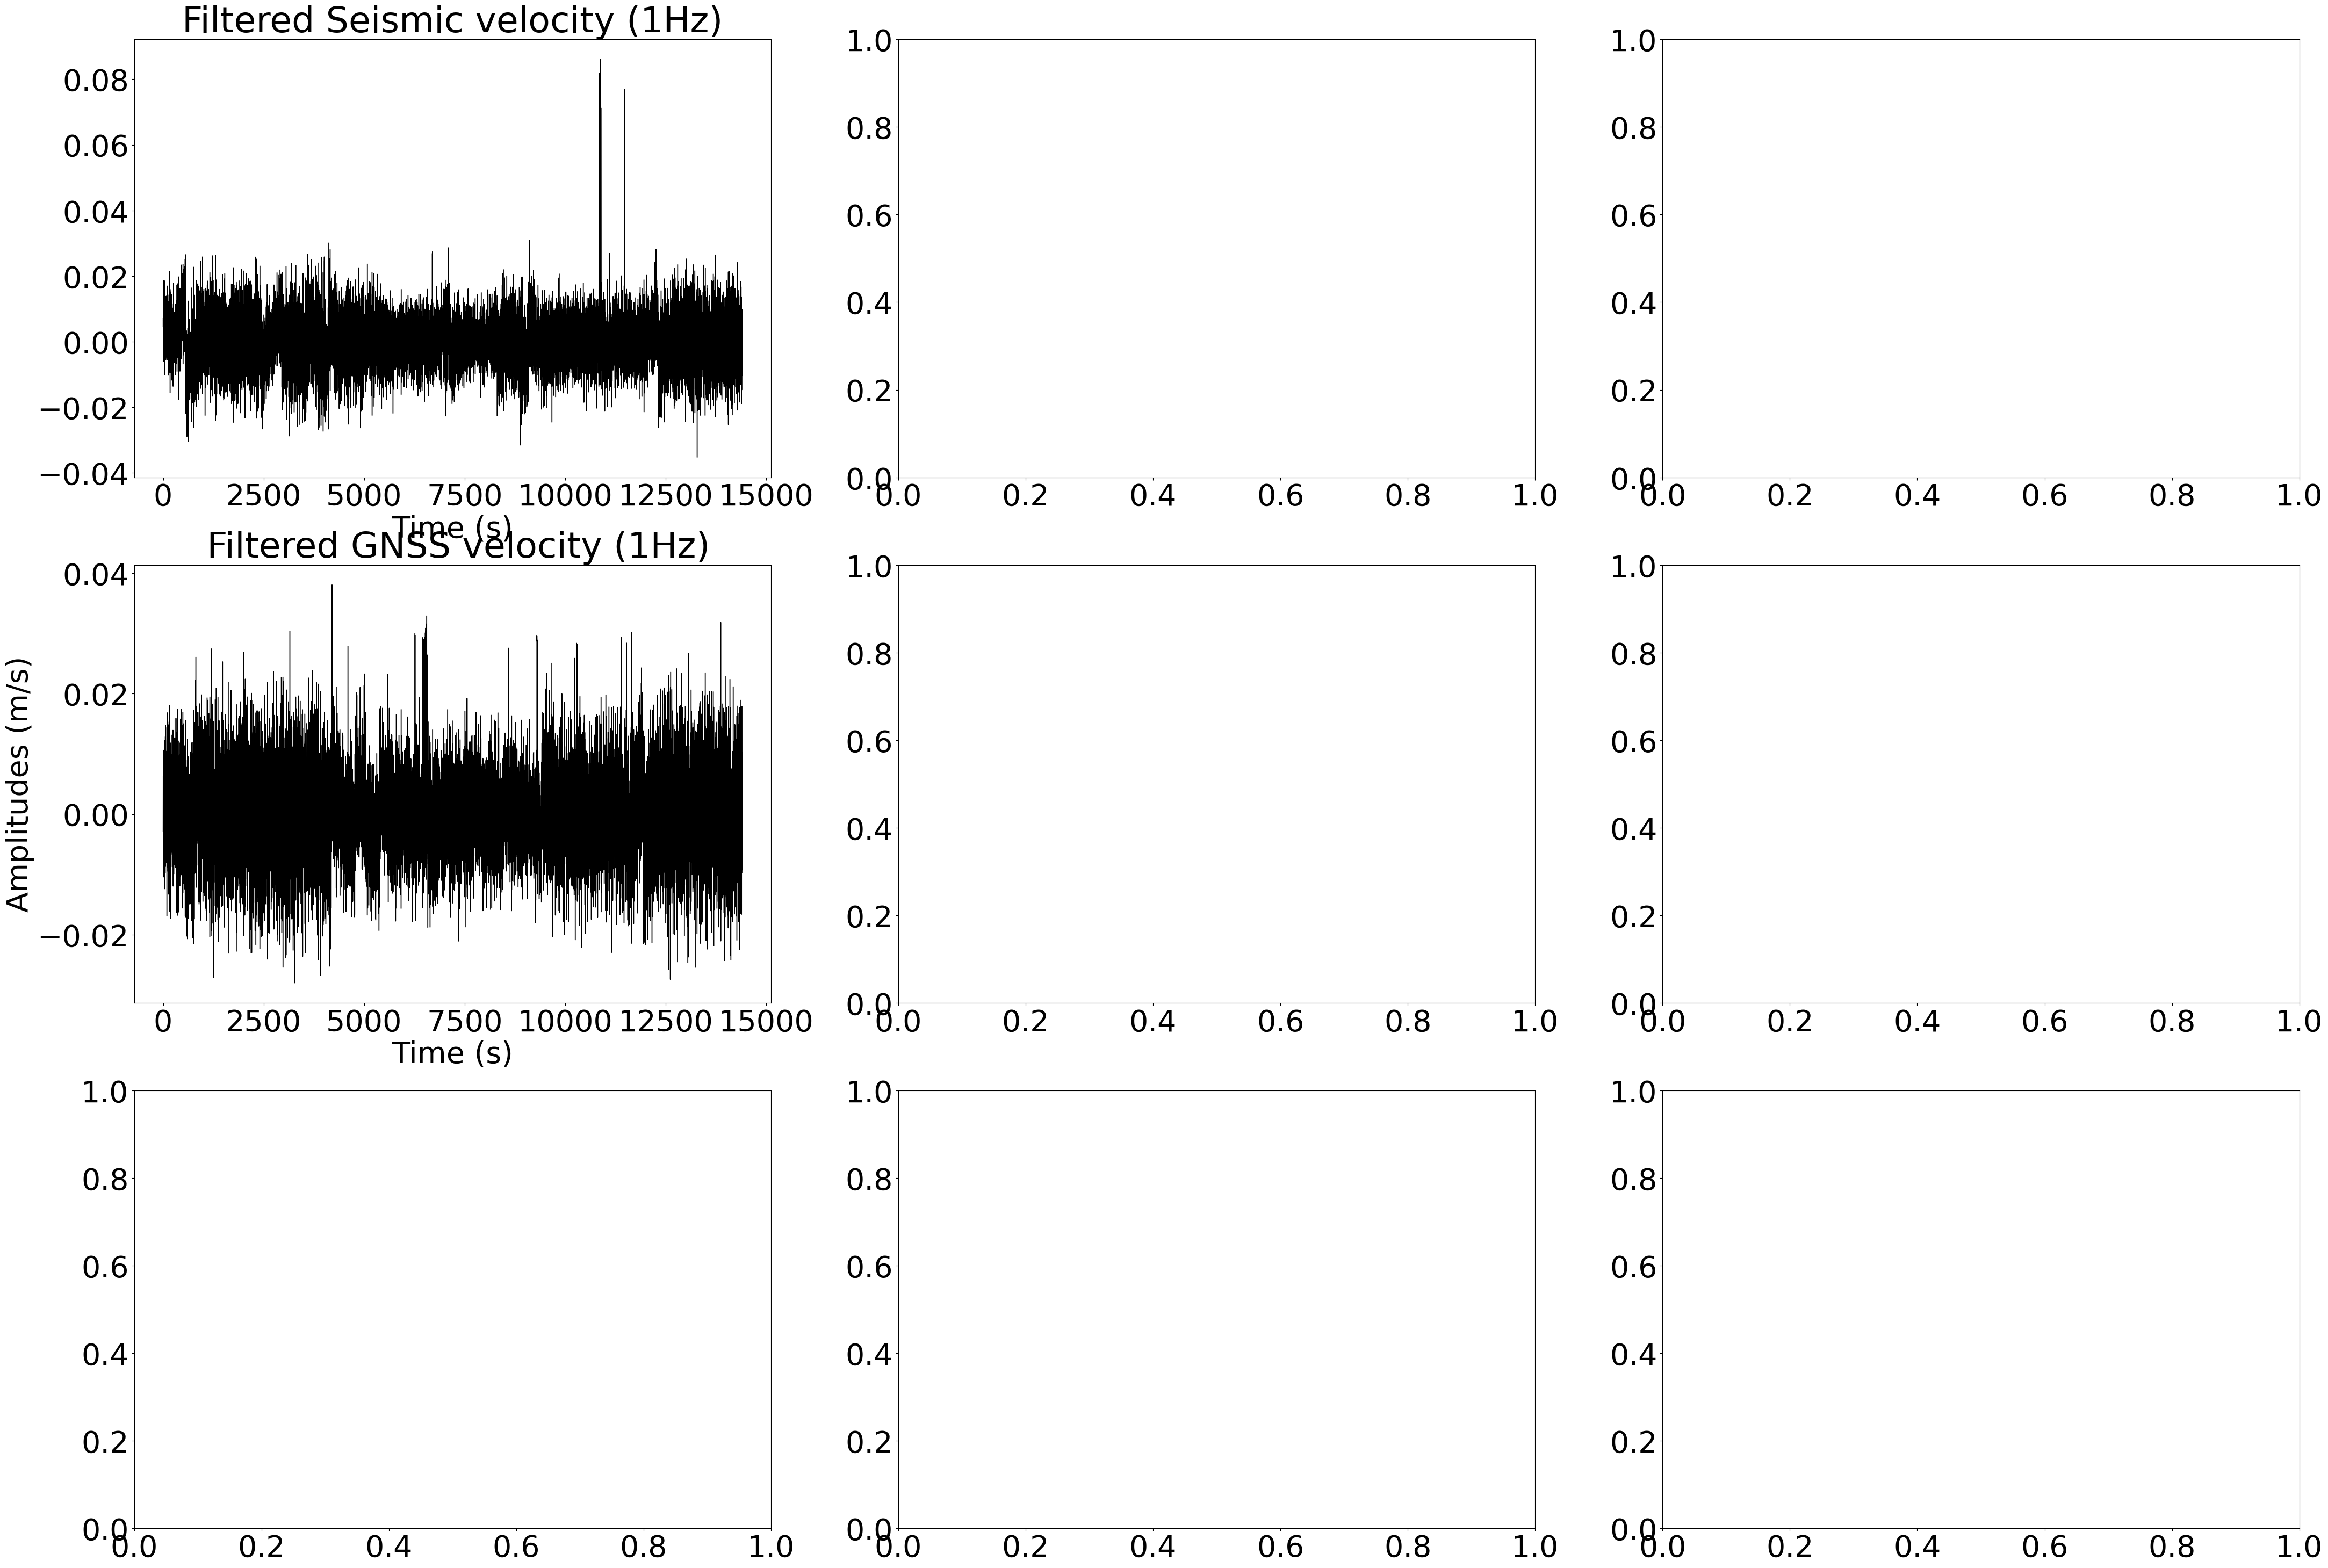

In [5]:
######## GNSS GNSS cross-correlation ##################


from obspy import UTCDateTime 
from obspy import Trace
from obspy import Stream
from obspy import read, read_inventory
from obspy.signal.cross_correlation import correlate, correlate_template, xcorr_max

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.cm as cmx
import datetime


def compute_shifte(cce):
    zero_index = int(len(cce) / 2) - 1
    shifte =  index_e - zero_index 
    return shifte

def compute_shiftn(ccn):
    zero_index = int(len(ccn) / 2) - 1
    shiftn =  index_n - zero_index 
    return shiftn

def compute_shiftz(ccz):
    zero_index = int(len(ccz) / 2) - 1
    shiftz =  index_z - zero_index 
    return shiftz

# READ INSTAVEL ASCII FILE
infile = '/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/gnss_12hr/LFRS_1hz.L2.igr.phase_vels'
site = np.genfromtxt(infile, dtype=None, encoding=None, names=['date','time','dt','lat','lon','height','vx', 'vy', 'vz', 'sigx', 'sigy', 'sigz', 'vdt', 'vn', 've', 'vu', 'sign', 'sige', 'sigu'])

# CREATE AN EMPTY STREAM AND POPULATE WITH EAST INSTAVEL DATA
st_gnss_ve = Stream(Trace())
st_gnss_ve[0].stats.network = '--'
st_gnss_ve[0].stats.station = 'LFRS'
st_gnss_ve[0].stats.channel = 'IVE'       # for [I]nst[V]el [E] component]
st_gnss_ve[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_ve[0].stats.sampling_rate = 1
st_gnss_ve[0].stats.calib = 1
st_gnss_ve[0].data = site['ve']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_ve[0].trim(dt, dt+14399)
st_gnss_ve[0].plot()
for i in range(len(st_gnss_ve[0].data)):
    if st_gnss_ve[0].data[i] > 0.05:
        st_gnss_ve[0].data[i] = 0
    if st_gnss_ve[0].data[i] < -0.05:
        st_gnss_ve[0].data[i] = 0
#    if st_gnss_ve[0].data[i-1]-st_gnss_ve[0].data[i] > 0.025:
#        st_gnss_ve[0].data[i] = 0
#        st_gnss_ve[0].data[i+1] = 0
#    if st_gnss_ve[0].data[i-1]-st_gnss_ve[0].data[i] < -0.025:
#        st_gnss_ve[0].data[i] = 0
#        st_gnss_ve[0].data[i+1] = 0
st_gnss_ve[0].detrend('linear')
st_gnss_ve[0].detrend('demean')
#st_gnss_ve[0].taper(0.85, type="cosine")
st_gnss_ve[0].plot()



# CREATE AN EMPTY STREAM AND POPULATE WITH NORTH INSTAVEL DATA
st_gnss_vn = Stream(Trace())
st_gnss_vn[0].stats.network = '--'
st_gnss_vn[0].stats.station = 'LFRS'
st_gnss_vn[0].stats.channel = 'IVN'       # for [I]nst[V]el [N] component]
st_gnss_vn[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_vn[0].stats.sampling_rate = 1
st_gnss_vn[0].stats.calib = 1
st_gnss_vn[0].data = site['vn']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_vn[0].trim(dt, dt+14399)
st_gnss_vn[0].plot()
for i in range(len(st_gnss_vn[0].data)):
    if st_gnss_vn[0].data[i] > 0.08:
        st_gnss_vn[0].data[i] = 0
    if st_gnss_vn[0].data[i] < -0.08:
        st_gnss_vn[0].data[i] = 0
st_gnss_vn[0].detrend('linear')
st_gnss_vn[0].detrend('demean')
#st_gnss_vn[0].taper(0.5,type="cosine")
st_gnss_vn[0].plot()



# CREATE AN EMPTY STREAM AND POPULATE WITH VERTICAL INSTAVEL DATA
st_gnss_vz = Stream(Trace())
st_gnss_vz[0].stats.network = '--'
st_gnss_vz[0].stats.station = 'LFRS'
st_gnss_vz[0].stats.channel = 'IVZ'       # for [I]nst[V]el [Z] component]
st_gnss_vz[0].stats.starttime = site["date"][0] + 'T' + site["time"][0]
st_gnss_vz[0].stats.sampling_rate = 1
st_gnss_vz[0].stats.calib = 1
st_gnss_vz[0].data = site['vz']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_gnss_vz[0].trim(dt, dt+14399)
st_gnss_vz[0].plot()
for i in range(len(st_gnss_vz[0].data)):
    if st_gnss_vz[0].data[i] > 0.05:
        st_gnss_vz[0].data[i] = 0
    if st_gnss_vz[0].data[i] < -0.05:
        st_gnss_vz[0].data[i] = 0
st_gnss_vz[0].detrend('linear')
st_gnss_vz[0].detrend('demean')
#st_gnss_vz[0].taper(0.85,type="cosine")
st_gnss_vz[0].plot()

st_gnss_fe = st_gnss_ve[0].copy()
st_gnss_fe.filter('bandpass', freqmin=0.001, freqmax=0.49, corners=4, zerophase=True)
st_gnss_fn = st_gnss_vn[0].copy()
st_gnss_fn.filter('bandpass', freqmin=0.001, freqmax=0.49, corners=4, zerophase=True)
st_gnss_fz = st_gnss_vz[0].copy()
st_gnss_fz.filter('bandpass', freqmin=0.001, freqmax=0.49, corners=4, zerophase=True)

# READ INSTAVEL ASCII FILE
infile1 = '/Users/revathymp/Desktop/UAF_academia/MSnoise_Backup/gnss_12hr/p800_1hz.L2.igr.phase_vels'
site1 = np.genfromtxt(infile1, dtype=None, encoding=None, names=['date','time','dt','lat','lon','height','vx', 'vy', 'vz', 'sigx', 'sigy', 'sigz', 'vdt', 'vn', 've', 'vu', 'sign', 'sige', 'sigu'])

# CREATE AN EMPTY STREAM AND POPULATE WITH EAST INSTAVEL DATA
st_g_ve = Stream(Trace())
st_g_ve[0].stats.network = '--'
st_g_ve[0].stats.station = 'P800'
st_g_ve[0].stats.channel = 'IVE'       # for [I]nst[V]el [E] component]
st_g_ve[0].stats.starttime = site1["date"][0] + 'T' + site1["time"][0]
st_g_ve[0].stats.sampling_rate = 1
st_g_ve[0].stats.calib = 1
st_g_ve[0].data = site1['ve']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_g_ve[0].trim(dt, dt+14399)
st_g_ve[0].plot()
for i in range(len(st_g_ve[0].data)):
    if st_g_ve[0].data[i] > 0.05:
        st_g_ve[0].data[i] = 0
    if st_g_ve[0].data[i] < -0.05:
        st_g_ve[0].data[i] = 0
#    if st_gnss_ve[0].data[i-1]-st_gnss_ve[0].data[i] > 0.025:
#        st_gnss_ve[0].data[i] = 0
#        st_gnss_ve[0].data[i+1] = 0
#    if st_gnss_ve[0].data[i-1]-st_gnss_ve[0].data[i] < -0.025:
#        st_gnss_ve[0].data[i] = 0
#        st_gnss_ve[0].data[i+1] = 0
st_g_ve[0].detrend('linear')
st_g_ve[0].detrend('demean')
#st_gnss_ve[0].taper(0.85, type="cosine")
st_g_ve[0].plot()


# CREATE AN EMPTY STREAM AND POPULATE WITH NORTH INSTAVEL DATA
st_g_vn = Stream(Trace())
st_g_vn[0].stats.network = '--'
st_g_vn[0].stats.station = 'P800'
st_g_vn[0].stats.channel = 'IVN'       # for [I]nst[V]el [N] component]
st_g_vn[0].stats.starttime = site1["date"][0] + 'T' + site1["time"][0]
st_g_vn[0].stats.sampling_rate = 1
st_g_vn[0].stats.calib = 1
st_g_vn[0].data = site1['vn']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_g_vn[0].trim(dt, dt+14399)
st_g_vn[0].plot()
for i in range(len(st_g_vn[0].data)):
    if st_g_vn[0].data[i] > 0.08:
        st_g_vn[0].data[i] = 0
    if st_g_vn[0].data[i] < -0.08:
        st_g_vn[0].data[i] = 0
st_g_vn[0].detrend('linear')
st_g_vn[0].detrend('demean')
#st_gnss_vn[0].taper(0.5,type="cosine")
st_g_vn[0].plot()


# CREATE AN EMPTY STREAM AND POPULATE WITH VERTICAL INSTAVEL DATA
st_g_vz = Stream(Trace())
st_g_vz[0].stats.network = '--'
st_g_vz[0].stats.station = 'P800'
st_g_vz[0].stats.channel = 'IVZ'       # for [I]nst[V]el [Z] component]
st_g_vz[0].stats.starttime = site1["date"][0] + 'T' + site1["time"][0]
st_g_vz[0].stats.sampling_rate = 1
st_g_vz[0].stats.calib = 1
st_g_vz[0].data = site1['vz']
dt = UTCDateTime("2022-01-01T00:00:00.000000Z")
st_g_vz[0].trim(dt, dt+14399)
st_g_vz[0].plot()
for i in range(len(st_g_vz[0].data)):
    if st_g_vz[0].data[i] > 0.05:
        st_g_vz[0].data[i] = 0
    if st_g_vz[0].data[i] < -0.05:
        st_g_vz[0].data[i] = 0
st_g_vz[0].detrend('linear')
st_g_vz[0].detrend('demean')
#st_gnss_vz[0].taper(0.85,type="cosine")
st_g_vz[0].plot()


st_g_fe = st_g_ve[0].copy()
st_g_fe.filter('bandpass', freqmin=0.001, freqmax=0.49, corners=4, zerophase=True)
st_g_fn = st_g_vn[0].copy()
st_g_fn.filter('bandpass', freqmin=0.001, freqmax=0.49, corners=4, zerophase=True)
st_g_fz = st_g_vz[0].copy()
st_g_fz.filter('bandpass', freqmin=0.001, freqmax=0.49, corners=4, zerophase=True)



# CROSS CORRELATION
lags = np.arange(-14399, 14400)  
cce = correlate_template(st_gnss_fe.data, st_g_fe.data, mode='full')
print (cce)
index_e = np.argmax(cce)
ccn = correlate_template(st_gnss_fn.data, st_g_fn.data, mode='full')
print (ccn)
index_n = np.argmax(ccn)
ccz = correlate_template(st_gnss_fz.data, st_g_fz.data, mode='full')
print (ccz)
index_z = np.argmax(ccz)


print(index_e)
print(max(cce))
print(compute_shifte(cce))
print(index_n)
print(max(ccn))
print(compute_shiftn(ccn))
print(index_z)
print(max(ccz))
print(compute_shiftz(ccz))

# CREATE STREAMS WITH ALL TRACES AND PLOT THEM
plt.rcParams['figure.figsize'] = [52,36]
plt.rcParams.update({'font.size': 40})
#plt.style.use('seaborn')

fig, ax = plt.subplots(3,3)

ax[0,0].plot(st_gnss_fn.times(), st_gnss_fn.data, 'k-', linewidth=1, label=((st_gnss_vn[0].stats['station'])+'.'+(st_gnss_vn[0].stats['channel'])))
ax[0,0].set_title('Filtered Seismic velocity (1Hz)')
#ax[0,2].set_ylabel('Normalized amplitude')
ax[0,0].set_xlabel('Time (s)')
ax[1,0].plot(st_g_fn.times(), st_g_fn.data, 'k-', linewidth=1, label=(st_g_vn[0].stats['station'])+'.N')
ax[1,0].set_title(' Filtered GNSS velocity (1Hz)')
ax[1,0].set_ylabel('Amplitudes (m/s)')
ax[1,0].set_xlabel('Time (s)')
ax[2,0].plot(lags, ccn, 'k', linewidth=1, label=('CC=%.1f' % max(ccn) +', lag=%d' % compute_shiftn(ccn))) 
ax[2,0].set_title('Cross-correlation for bandpass 0.05-0.1 Hz')
ax[2,0].set_ylabel('cross-correlation')
#ax[2,0].set_xlim(-100, 500)
ax[2,0].set_xlabel('lags')

ax[0,1].plot(st_gnss_fz.times(), st_gnss_fz.data, 'k-', linewidth=1, label=((st_gnss_vz[0].stats['station'])+'.'+(st_gnss_vz[0].stats['channel'])))
ax[0,1].set_title('Filtered GNSS velocity (1Hz)')
#ax[0,2].set_ylabel('Normalized amplitude')
ax[0,1].set_xlabel('Time (s)')
ax[1,1].plot(st_g_fz.times(), st_g_fz.data, 'k-', linewidth=1, label=(st_g_vz[0].stats['station'])+'.Z')
ax[1,1].set_title(' Filtered GNSS velocity (1Hz)')
ax[1,1].set_ylabel('Amplitudes (m/s)')
ax[1,1].set_xlabel('Time (s)')
ax[2,1].plot(lags, ccz, 'k', linewidth=1, label=('CC=%.1f' % max(ccz) +', lag=%d' % compute_shiftz(ccz)))
ax[2,1].set_title('Cross-correlation for bandpass 0.05-0.1 Hz')
ax[2,1].set_ylabel('cross-correlation')
#ax[2,1].set_xlim(-200, 200)
ax[2,1].set_xlabel('lags')
plt.tight_layout()

ax[0,2].plot(st_gnss_fe.times(), st_gnss_fe.data, 'k-', linewidth=1, label=((st_gnss_ve[0].stats['station'])+'.'+(st_gnss_ve[0].stats['channel'])))
ax[0,2].set_title('Filtered GNSS velocity (1Hz)')
#ax[0,2].set_ylabel('Normalized amplitude')
ax[0,2].set_xlabel('Time (s)')
ax[1,2].plot(st_g_fe.times(), st_g_fe.data, 'k-', linewidth=1, label=(st_g_ve[0].stats['station'])+'.Z')
ax[1,2].set_title(' Filtered GNSS velocity (1Hz)')
ax[1,2].set_ylabel('Amplitudes (m/s)')
ax[1,2].set_xlabel('Time (s)')
ax[2,2].plot(lags, cce, 'k', linewidth=1, label=('CC=%.1f' % max(cce) +', lag=%d' % compute_shifte(cce)))
ax[2,2].set_title('Cross-correlation for bandpass 0.05-0.1 Hz')
ax[2,2].set_ylabel('cross-correlation')
#ax[2,2].set_xlim(-200, 200)
ax[2,2].set_xlabel('lags')
plt.tight_layout()

# TRACE LEGENDS
for row in ax[:,0]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend
for row in ax[:,1]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend
for row in ax[:,2]:
    ll = row.legend(loc=1)
    plt.setp(ll.get_texts(), color='red') #color legend

ll = ax[1,1].legend(loc=1)
plt.setp(ll.get_texts(), color='red') #color legend

plt.show()
fig.savefig("../LFRS-P800-GNSS-6hr.pdf")
fig.savefig("../LFRS-P800-GNSS-6hr.png")
